In [1]:
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 16.6 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [2]:
from cProfile import label
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from matplotlib import pyplot
from matplotlib.pyplot import*

GETTING AMD DATA

In [3]:
AMD = pdr.get_data_yahoo(['AMD'], start="01/01/2015", interval="m") 
AMD = AMD['Adj Close']
AMD

Symbols,AMD
Date,
2015-01-01,2.570000
2015-02-01,3.110000
2015-03-01,2.680000
2015-04-01,2.260000
2015-05-01,2.280000
...,...
2022-05-01,101.860001
2022-06-01,76.470001
2022-07-01,94.470001


AMD RETURNS 

In [4]:
ret = np.log(AMD) - np.log(AMD.shift(1))
ret

Symbols,AMD
Date,
2015-01-01,NaN
2015-02-01,0.190717
2015-03-01,-0.148806
2015-04-01,-0.170452
2015-05-01,0.008811
...,...
2022-05-01,0.174849
2022-06-01,-0.286701
2022-07-01,0.211384


GETTING INTEL DATA

In [5]:
INTEL = pdr.get_data_yahoo(['INTC'], start="01/01/2015", interval="m") 
INTEL = INTEL['Adj Close']
INTEL

Symbols,INTC
Date,
2015-01-01,26.643389
2015-02-01,26.812725
2015-03-01,25.396935
2015-04-01,26.436523
2015-05-01,27.987789
...,...
2022-05-01,43.631149
2022-06-01,37.036106
2022-07-01,35.947102


INTELL RETURNS

In [6]:
reti = np.log(INTEL) - np.log(INTEL.shift(1))
reti

Symbols,INTC
Date,
2015-01-01,NaN
2015-02-01,0.006336
2015-03-01,-0.054248
2015-04-01,0.040118
2015-05-01,0.057022
...,...
2022-05-01,0.018862
2022-06-01,-0.163878
2022-07-01,-0.029845


In [8]:
sprices = pdr.get_data_yahoo(['AMD','INTC'],start="01/01/2017", end="08/15/2022",interval="m")
sprices=sprices['Adj Close']

In [16]:
# Calculating returns:
sr = np.log(sprices) - np.log(sprices.shift(1))
# Deleting NAs:
sr=sr.dropna()

HYPOTESIS
# H0: (mean(rAMD) - mean(rINTEL)) = 0
# Ha: (mean(rAMD) - mean(rINTEL)) <> 0

In [17]:
# Calculating the standard error of the difference of the means:
N = sr['AMD'].count()
amdvar = sr['AMD'].var()
intelvar = sr['INTC'].var()
sediff = np.sqrt((1/N) * (amdvar + intelvar ) )

# Calculating the t-Statistic:
t = (sr['AMD'].mean() - sr['INTC'].mean()) / sediff
t

1.4694604124003288

In [18]:
# t-Statistic:
from scipy import stats as st
# 2-tailed pvalue
df = ( ((N-1) / N**2) * (amdvar + intelvar)**2  / ( (amdvar/N)**2 + (intelvar/N)**2  ) )
pvalue = 2 * st.t.sf(np.abs(t), df)
pvalue

0.14507558355826364

In [19]:
# ttest_ind
st.ttest_ind(sr['AMD'],sr['INTC'],equal_var=False)


Ttest_indResult(statistic=1.4694604124003288, pvalue=0.14507558355826364)

In [13]:
pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
import researchpy as rp
# Using the ttest function from researchpy:
rp.ttest(sr['AMD'],sr['INTC'],equal_variances=False)
# We got the same result as above!

(   Variable      N      Mean        SD        SE  95% Conf.  Interval
 0       AMD   67.0  0.033398  0.162006  0.019792  -0.006119  0.072914
 1      INTC   67.0  0.001331  0.075230  0.009191  -0.017019  0.019681
 2  combined  134.0  0.017364  0.126853  0.010958  -0.004311  0.039040,
                Welch's t-test  results
 0  Difference (AMD - INTC) =    0.0321
 1       Degrees of freedom =   94.0232
 2                        t =    1.4695
 3    Two side test p value =    0.1451
 4   Difference < 0 p value =    0.9275
 5   Difference > 0 p value =    0.0725
 6                Cohen's d =    0.2539
 7                Hedge's g =    0.2524
 8            Glass's delta =    0.1979
 9              Pearson's r =    0.1498)

In [22]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [26]:
import yfinance as yf
import matplotlib.pyplot as plt

In [24]:
# We download price data for Microsoft and the S&P500 index:
prices=yf.download(tickers="MSFT ^GSPC", start="2019-01-01",interval="1mo")
# We select Adjusted closing prices and drop any row with NA values:
adjprices = prices['Adj Close'].dropna()

[*********************100%***********************]  2 of 2 completed


Plotting prices

<Figure size 432x288 with 0 Axes>

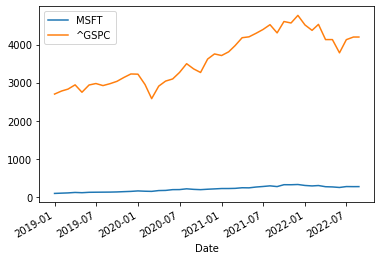

In [27]:
plt.clf()
adjprices.plot(y=['MSFT','^GSPC'])
plt.show()

In [28]:
adjprices['iMSFT'] = adjprices['MSFT'] / adjprices['MSFT'][0]
adjprices['iGSPC'] = adjprices['^GSPC'] / adjprices['^GSPC'][0]

Plotting adj prices

<Figure size 432x288 with 0 Axes>

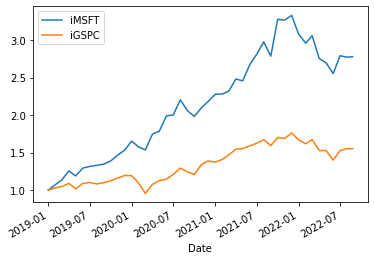

In [29]:
plt.clf()
adjprices.plot(y=['iMSFT','iGSPC'])
plt.show()

Both cc historical returns

In [31]:
r = np.log(adjprices) - np.log(adjprices.shift(1))
# Dropping rows with NA values (the first month will have NAs)
r = r.dropna()
# Selecting only 2 columns (out of the 4 columns):
r = r[['MSFT','^GSPC']]
# Renameing the column names:
r.columns = ['MSFT','GSPC']
r.head()

,MSFT,GSPC
Date,,
2019-02-01,0.070250,0.029296
2019-03-01,0.055671,0.017766
2019-04-01,0.101963,0.038560
2019-05-01,-0.054442,-0.068041
2019-06-01,0.083539,0.066658


Linear relationship between the MSFT prices and the GSPC index

<Figure size 432x288 with 0 Axes>

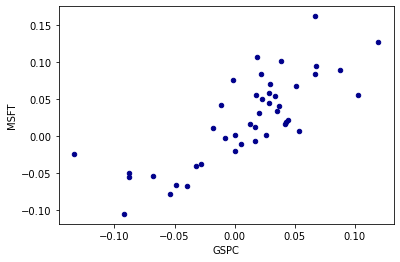

In [32]:
plt.clf()
r.plot.scatter(x='GSPC', y='MSFT',c='DarkBlue')
plt.show()

Relationship between the MSFT returns and GSPC returns

<Figure size 432x288 with 0 Axes>

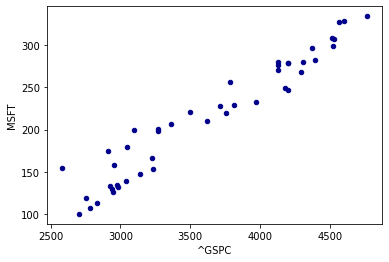

In [33]:
plt.clf()
adjprices.plot.scatter(x='^GSPC', y='MSFT',c='DarkBlue')
plt.show()

What do you see? Which plot conveys a stronger linear relationship?

IT SEEMS THAT THE ADJUSTED PRICES PLOT HAS A STRONGER LINEAR RELATIONSHIP 

<Figure size 432x288 with 0 Axes>

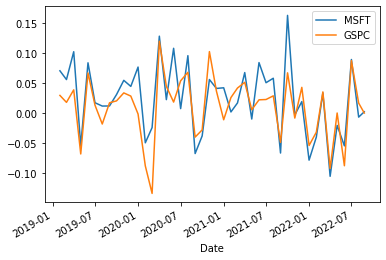

In [34]:
plt.clf()
r.plot(y=['MSFT','GSPC'])
plt.show()

#Covariance an correlation


Following the formula

In [35]:
msft_mean = r['MSFT'].mean()
gspc_mean = r['GSPC'].mean()
N = r['GSPC'].count()
sum_of_prod = ((r['MSFT'] - msft_mean) * (r['GSPC'] - gspc_mean) ).sum()  
cov = sum_of_prod / (N-1)
cov

0.0024515478132620715

Using numpy

In [36]:
covm = np.cov(r['MSFT'],r['GSPC'])
covm

array([[0.00349583, 0.00245155],
       [0.00245155, 0.00277006]])

Covariance between MSFT and GSPC

In [37]:
cov = covm[0,1]
cov

0.002451547813262072

CORRELATION MATRIX:

In [38]:
corr = np.corrcoef(r['MSFT'],r['GSPC'])
corr

array([[1.        , 0.78780766],
       [0.78780766, 1.        ]])

In [39]:
corr2 = cov / (r['MSFT'].std() * r['GSPC'].std())
corr2

0.7878076623245043

2 tailed p-value

In [40]:
from scipy.stats import pearsonr
corr2 = pearsonr(r['MSFT'],r['GSPC'])
corr2

(0.7878076623245043, 2.215770552517971e-10)